# Logistic regression (Bank Loan Modelling)

- Personal_loan is the dependent variable
- Rest all attributes are independent variable

In [1]:
import pandas as pd
dataset=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name='Data')
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [2]:
dataset.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [3]:
dataset.isna().sum().sum()

0

In [4]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
x=dataset[['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']]
y=dataset.Personal_Loan

In [7]:
import statsmodels.api as sm
constant=sm.add_constant(x)
logistic=sm.Logit(y,constant)

result=logistic.fit()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Mon, 17 Aug 2020   Pseudo R-squ.:                  0.5938
Time:                        08:13:54   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities_Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD_Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""

# Inferences

The attributes that are most significantly important for getting loan are:
    1. 'Income' of the applicant
    2. 'Family' members of the applicant
    3. Avg. spending on credit cards per month ($000)
    4. Education Level
    5. Does the customer has the certificate of deposite with the bank 
    6. Does the customer uses Internet Banking Facilities 
    7. Does the customer use the Credit card issued by the Universal Bank
    

# Linear regression (Real estate Analysis)
____

# Model 1 (Price vs Sqft_living)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sqrfeet=pd.read_excel('Linear Regression.xlsx',sheet_name=0)

sqrfeet.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [11]:
data=sqrfeet.iloc[:,:2]
data.head()

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680


In [12]:
data.dtypes

price          int64
sqft_living    int64
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   price        21613 non-null  int64
 1   sqft_living  21613 non-null  int64
dtypes: int64(2)
memory usage: 337.8 KB


In [14]:
data.describe()

,price,sqft_living
count,2.161300e+04,21613.000000
mean,5.400881e+05,2079.899736
std,3.671272e+05,918.440897
min,7.500000e+04,290.000000
25%,3.219500e+05,1427.000000
50%,4.500000e+05,1910.000000
75%,6.450000e+05,2550.000000
max,7.700000e+06,13540.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A6A98FAC8>,
      dtype=object)

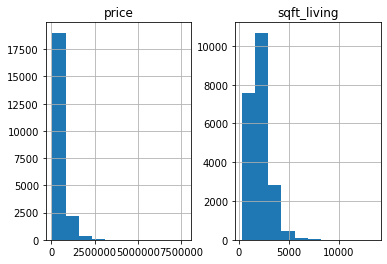

In [15]:
data.hist()

In [16]:
data.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


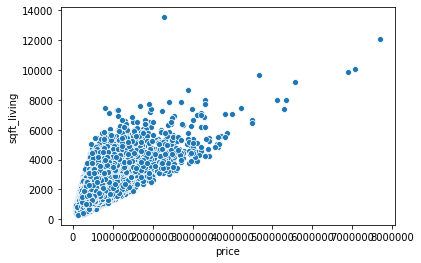

In [18]:
sns.scatterplot(data.price,data.sqft_living)

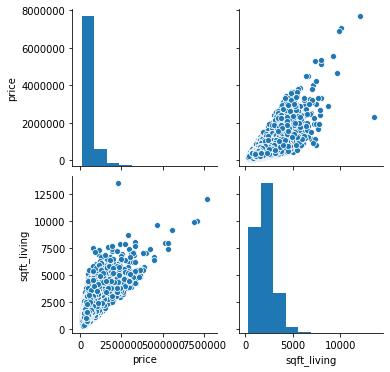

In [19]:
sns.pairplot(data)

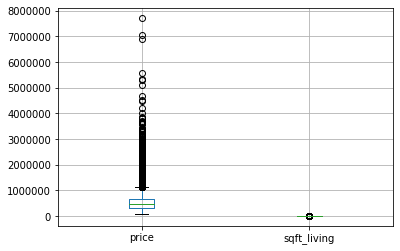

In [20]:
data.boxplot()

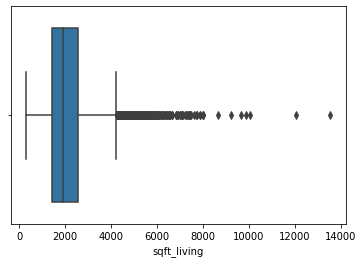

In [22]:
sns.boxplot(data.sqft_living)

# Assign the features to X & Y

In [23]:
X=data.iloc[:,-1:]
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [24]:
Y=data.iloc[:,:1]
Y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


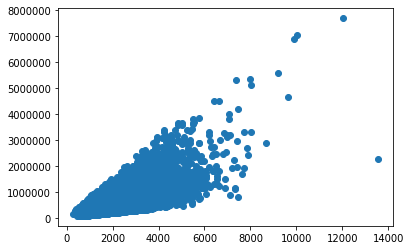

In [25]:
plt.scatter(X,Y)

# Split the records for training and testing

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

data.shape

(21613, 2)

In [29]:
x_train.shape

(17290, 1)

In [30]:
x_test.shape

(4323, 1)

In [31]:
y_train.shape

(17290, 1)

# Model building

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

# Train the model

In [33]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lin_reg.coef_

array([[280.67382569]])

In [35]:
lin_reg.intercept_

array([-42568.70358496])

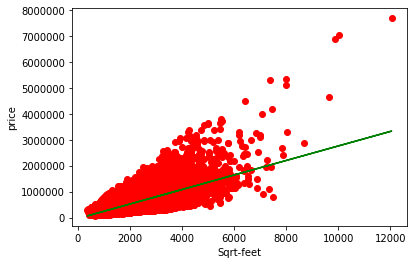

In [36]:
#Visualise Training set result
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lin_reg.predict(x_train), color = 'green')
#plt.title('Swedish Automobile Insurance Data (Training set)')
plt.xlabel('Sqrt-feet')
plt.ylabel('price')
plt.show()

# Test the Model

In [37]:
ypred=lin_reg.predict(x_test)
ypred

array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

In [38]:
x_test

,sqft_living
6638,2410
7366,2170
3158,1450
9117,4500
3392,860
...,...
8494,1530
5359,1580
5242,2650
13777,820


In [39]:
data.head()

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680


# Estimate the cost

In [40]:
from sklearn.metrics import mean_squared_error,r2_score


RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_sqr=r2_score(y_test,ypred)

print("the R- Squared value is ....",r_sqr)
print('the RMSE value is ',RMSE)

the R- Squared value is .... 0.5031163723285275
the RMSE value is  263380.00189817196


# Forcasting

In [41]:
data.head()

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680


In [42]:
unseen=lin_reg.predict(np.array([[700]]))
print('The unseen for given data is - ',unseen)

The unseen for given data is -  [[153902.97439721]]


# Model 2 (multiple linear regression)

# price vs bedrooms , bathrooms , floors

In [44]:
sqrfeet.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [45]:
# Dependent variable
Y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [46]:
# Independent Variable
Z=sqrfeet.iloc[:,2:]
Z.head()

,bedrooms,bathrooms,floors
0,3,1.00,1.0
1,3,2.25,2.0
2,2,1.00,1.0
3,4,3.00,1.0
4,3,2.00,1.0


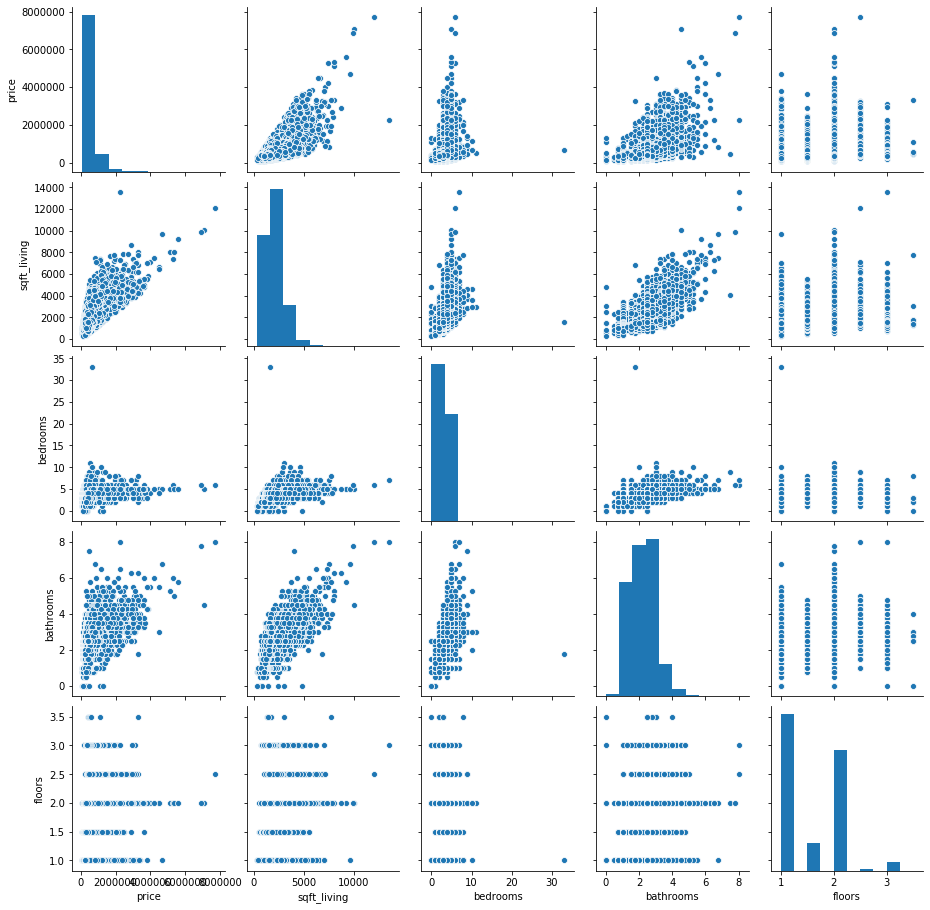

In [47]:
sns.pairplot(sqrfeet)

# Split the data for training and testing

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Z,Y,test_size=0.25,random_state=2)

sqrfeet.shape

(21613, 5)

In [50]:
x_train.shape

(16209, 3)

In [52]:
x_test.shape

(5404, 3)

In [53]:
y_train.shape

(16209, 1)

In [54]:
y_test.shape

(5404, 1)

# Train the regression model by calling linear regression algorithm from the sklearn

In [55]:
from sklearn.linear_model import LinearRegression
mul_reg=LinearRegression()

mul_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# Train
mul_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# test the model

In [57]:
ypred=mul_reg.predict(x_test)
ypred

array([[583809.52412306],
       [389146.47608391],
       [252007.37376043],
       ...,
       [505478.85421909],
       [428432.67101895],
       [501625.39410757]])

In [58]:
unseen_pred= mul_reg.predict(np.array([[3,2,2]]))
print("The ins for this person is = ",unseen_pred)

The ins for this person is =  [[504194.36751525]]


In [59]:
sqrfeet.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [61]:
from sklearn.metrics import r2_score,mean_squared_error
print('The r - Square is.......',r2_score(y_test,ypred))
print('The RMSE value is.....',np.sqrt(mean_squared_error(y_test,ypred)))

The r - Square is....... 0.2811314174379954
The RMSE value is..... 325895.2734724696
